In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0202/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 443 ms, sys: 25.4 ms, total: 469 ms
Wall time: 470 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.009310,0.0,0.011365,0.0,-0.029393,3.456822e-02,-0.007402,0.668349,0.043261,...,0.0,-0.004518,0.0,-0.003136,0.0,-0.011389,0.0,0.018781,0.0,-0.016691
1,0.0,-0.007601,0.0,0.003203,0.0,-0.021079,0.000000e+00,0.005239,0.000000,0.038788,...,0.0,-0.002360,0.0,-0.006732,0.0,-0.004313,0.0,-0.007847,0.0,-0.010245
2,0.0,-0.010790,0.0,-0.000529,0.0,-0.025511,0.000000e+00,-0.003280,0.019771,0.040083,...,0.0,-0.003425,0.0,-0.010097,0.0,-0.011670,0.0,-0.006169,0.0,0.017415
3,0.0,-0.003466,0.0,0.009428,0.0,-0.008220,5.677393e-07,-0.000443,0.000004,0.042489,...,0.0,-0.005560,0.0,-0.000440,0.0,-0.011229,0.0,0.000549,0.0,-0.003220
4,0.0,-0.000729,0.0,-0.001791,0.0,-0.000274,1.649071e-03,-0.002393,0.000865,0.040596,...,0.0,-0.003933,0.0,-0.001200,0.0,-0.006345,0.0,0.008322,0.0,0.009772


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,3.456822e-02,0.668349,1.248073e-05,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.019771,6.234838e-01,0.000027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.677393e-07,0.000004,2.414957e-12,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.649071e-03,0.000865,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,3.517265e-02,0.951013,1.248081e-05,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.019968,8.654154e-01,0.000027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.677395e-07,0.000004,2.414957e-12,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.650432e-03,0.000866,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    17.999960
1    21.000000
2    23.000000
3    20.999982
4    21.000000
5    18.000000
6    18.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.009310,0.011365,-0.029393,-0.007402,0.043261,0.020316,0.000171,-0.010920,-0.024435,-0.005965,...,-0.007640,-0.007551,0.008582,-0.044691,0.001769,-0.004518,-0.003136,-0.011389,0.018781,-0.016691
1,-0.007601,0.003203,-0.021079,0.005239,0.038788,0.033029,0.004557,-0.006446,-0.010961,-0.004939,...,0.010615,-0.002803,0.018644,-0.032808,-0.003853,-0.002360,-0.006732,-0.004313,-0.007847,-0.010245
2,-0.010790,-0.000529,-0.025511,-0.003280,0.040083,0.017495,-0.007686,-0.008054,-0.008686,-0.010326,...,-0.000610,-0.009717,0.011445,-0.018245,-0.000252,-0.003425,-0.010097,-0.011670,-0.006169,0.017415
3,-0.003466,0.009428,-0.008220,-0.000443,0.042489,0.002825,0.010770,-0.003207,-0.003684,-0.002460,...,0.005368,-0.000533,0.004087,-0.016972,0.004192,-0.005560,-0.000440,-0.011229,0.000549,-0.003220
4,-0.000729,-0.001791,-0.000274,-0.002393,0.040596,-0.011287,0.000280,-0.003711,-0.004825,-0.005108,...,0.005544,-0.003199,0.005841,-0.016097,0.007336,-0.003933,-0.001200,-0.006345,0.008322,0.009772


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.009267,0.011430,-0.028965,-0.007375,0.044210,0.020524,0.000171,-0.010861,-0.024139,-0.005947,...,-0.007611,-0.007523,0.008619,-0.043707,0.001770,-0.004507,-0.003131,-0.011324,0.018959,-0.016553
1,-0.007572,0.003208,-0.020858,0.005252,0.039550,0.033581,0.004568,-0.006425,-0.010901,-0.004927,...,0.010672,-0.002799,0.018818,-0.032275,-0.003846,-0.002357,-0.006709,-0.004304,-0.007817,-0.010193
2,-0.010732,-0.000529,-0.025188,-0.003274,0.040897,0.017648,-0.007657,-0.008022,-0.008648,-0.010273,...,-0.000610,-0.009670,0.011511,-0.018080,-0.000252,-0.003419,-0.010047,-0.011602,-0.006150,0.017568
3,-0.003460,0.009473,-0.008186,-0.000443,0.043405,0.002829,0.010829,-0.003202,-0.003677,-0.002457,...,0.005383,-0.000533,0.004095,-0.016829,0.004201,-0.005545,-0.000440,-0.011167,0.000550,-0.003214
4,-0.000728,-0.001789,-0.000274,-0.002390,0.041432,-0.011224,0.000280,-0.003704,-0.004813,-0.005095,...,0.005559,-0.003194,0.005858,-0.015968,0.007363,-0.003925,-0.001199,-0.006325,0.008357,0.009820
5,0.002306,0.011967,0.014790,0.001076,0.037656,0.003168,0.006140,0.000794,0.003300,0.002761,...,0.004707,0.001798,0.017569,-0.015053,0.007565,-0.003071,0.000981,0.000223,0.000758,0.002301
6,0.002232,0.005653,0.010474,-0.001189,0.038143,-0.003923,0.003766,-0.003555,0.005858,-0.003029,...,-0.001098,-0.000902,0.017716,-0.004735,0.006399,-0.003664,-0.001236,-0.002648,-0.008899,0.001396


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.0,0.011430,0.0,0.000000,0.044210,0.020524,0.000171,0.0,0.0,0.0,...,0.000000,0.0,0.008619,0.0,0.001770,0.0,0.0,0.0,0.018959,0.000000
1,0.0,0.003208,0.0,0.005252,0.039550,0.033581,0.004568,0.0,0.0,0.0,...,0.010672,0.0,0.018818,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.040897,0.017648,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.011511,0.0,0.000000,0.0,0.0,0.0,0.000000,0.017568
3,0.0,0.009473,0.0,0.000000,0.043405,0.002829,0.010829,0.0,0.0,0.0,...,0.005383,0.0,0.004095,0.0,0.004201,0.0,0.0,0.0,0.000550,0.000000
4,0.0,0.000000,0.0,0.000000,0.041432,0.000000,0.000280,0.0,0.0,0.0,...,0.005559,0.0,0.005858,0.0,0.007363,0.0,0.0,0.0,0.008357,0.009820


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    15.464801
1    14.970230
2    16.053194
3    14.533615
4    12.269298
5    16.765488
6    14.660682
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0202_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0202_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0202_true_and_forecasted_values_df

,True_count,Forecasted_count
0,17.999960,15.464801
1,21.000000,14.970230
2,23.000000,16.053194
3,20.999982,14.533615
4,21.000000,12.269298
5,18.000000,16.765488
6,18.000000,14.660682


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

5.628466007049352

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

5.04037646618536

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.2247568141404081, pvalue=0.6280048567026482)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-8.239845537291163

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 276 ms, sys: 59.1 ms, total: 335 ms
Wall time: 336 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-1.1484861e-02, -3.8947463e-03, -1.0785341e-02, ...,
         8.1232786e-03,  2.2045374e-03,  4.0419102e-03],
       [-9.8269582e-03, -3.8900375e-03, -1.0649085e-02, ...,
         6.8355799e-03,  4.0934086e-03,  4.4977665e-03],
       [-1.0552287e-02, -4.4243336e-03, -1.0084271e-02, ...,
         7.1597099e-03,  2.1145344e-03,  3.6810637e-03],
       ...,
       [-6.5891743e-03, -8.8288784e-03, -1.0195315e-02, ...,
        -4.4303536e-03, -8.6843967e-05,  4.5681000e-04],
       [-6.5835714e-03, -7.7229142e-03, -9.5522404e-03, ...,
        -2.5644898e-03,  5.5682659e-04,  1.1669397e-03],
       [-5.2567124e-03, -7.8918338e-03, -9.1392994e-03, ...,
        -3.2083392e-03,  1.5069246e-03,  2.3710728e-03]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 19.1 ms, sys: 1.06 ms, total: 20.2 ms
Wall time: 19.6 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.00812328, 0.00220454,
        0.00404191],
       [0.        , 0.        , 0.        , ..., 0.00683558, 0.00409341,
        0.00449777],
       [0.        , 0.        , 0.        , ..., 0.00715971, 0.00211453,
        0.00368106],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00045681],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00055683,
        0.00116694],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00150692,
        0.00237107]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[22.526882, 22.797026, 24.199585, ..., 16.196215, 19.175297,
        16.606024],
       [21.527033, 19.391697, 20.91206 , ..., 17.36559 , 21.265024,
        22.669733],
       [25.392197, 21.480328, 20.538572, ..., 17.968794, 22.434145,
        18.423561],
       ...,
       [20.533897, 20.789505, 21.301851, ..., 22.919817, 25.61365 ,
        25.316488],
       [22.908535, 22.33943 , 27.137793, ..., 28.28143 , 27.058624,
        27.025702],
       [20.296019, 22.390862, 26.861929, ..., 23.149353, 27.972485,
        22.678179]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[22.526882, 22.797026, 24.199585, ..., 16.196215, 19.175297,
        16.606024],
       [21.527033, 19.391697, 20.91206 , ..., 17.36559 , 21.265024,
        22.669733],
       [25.392197, 21.480328, 20.538572, ..., 17.968794, 22.434145,
        18.423561],
       ...,
       [20.533897, 20.789505, 21.301851, ..., 22.919817, 25.61365 ,
        25.316488],
       [22.908535, 22.33943 , 27.137793, ..., 28.28143 , 27.058624,
        27.025702],
       [20.296019, 22.390862, 26.861929, ..., 23.149353, 27.972485,
        22.678179]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[14.29046426],
       [12.71471143],
       [13.15392497],
       [12.41428988],
       [10.65007801],
       [13.56265728],
       [12.57721612]])

In [63]:
ui_train

array([[27.1687007 ],
       [25.58993373],
       [26.59277101],
       [26.11294603],
       [23.95894356],
       [28.08764815],
       [25.70510292]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

13.407529163360596

In [66]:
y_traina = block_0202_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[17.99996032],
       [21.00000011],
       [22.99999958],
       [20.99998231],
       [21.00000003],
       [17.99999995],
       [18.00000018]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

1.0

In [70]:
np.mean(output, axis = 0)

array([20.090748, 18.734653, 19.283197, 18.895807, 16.587973, 20.466602,
       18.670237], dtype=float32)

In [71]:
sum_forecasted_values

0    15.464801
1    14.970230
2    16.053194
3    14.533615
4    12.269298
5    16.765488
6    14.660682
dtype: float64

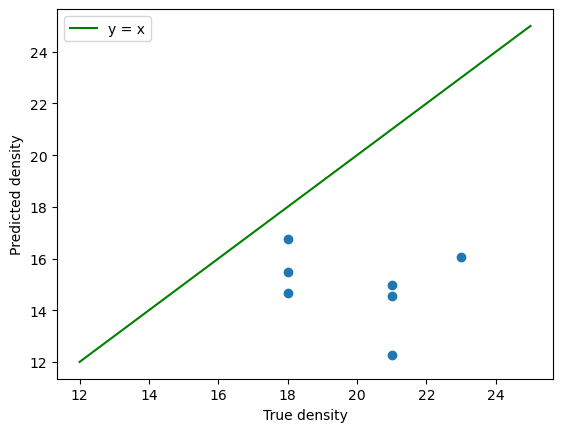

In [72]:
plt.scatter(block_0202_true_and_forecasted_values_df['True_count'], block_0202_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([12, 25], [12, 25], color='green', label='y = x')
plt.legend()
plt.show()

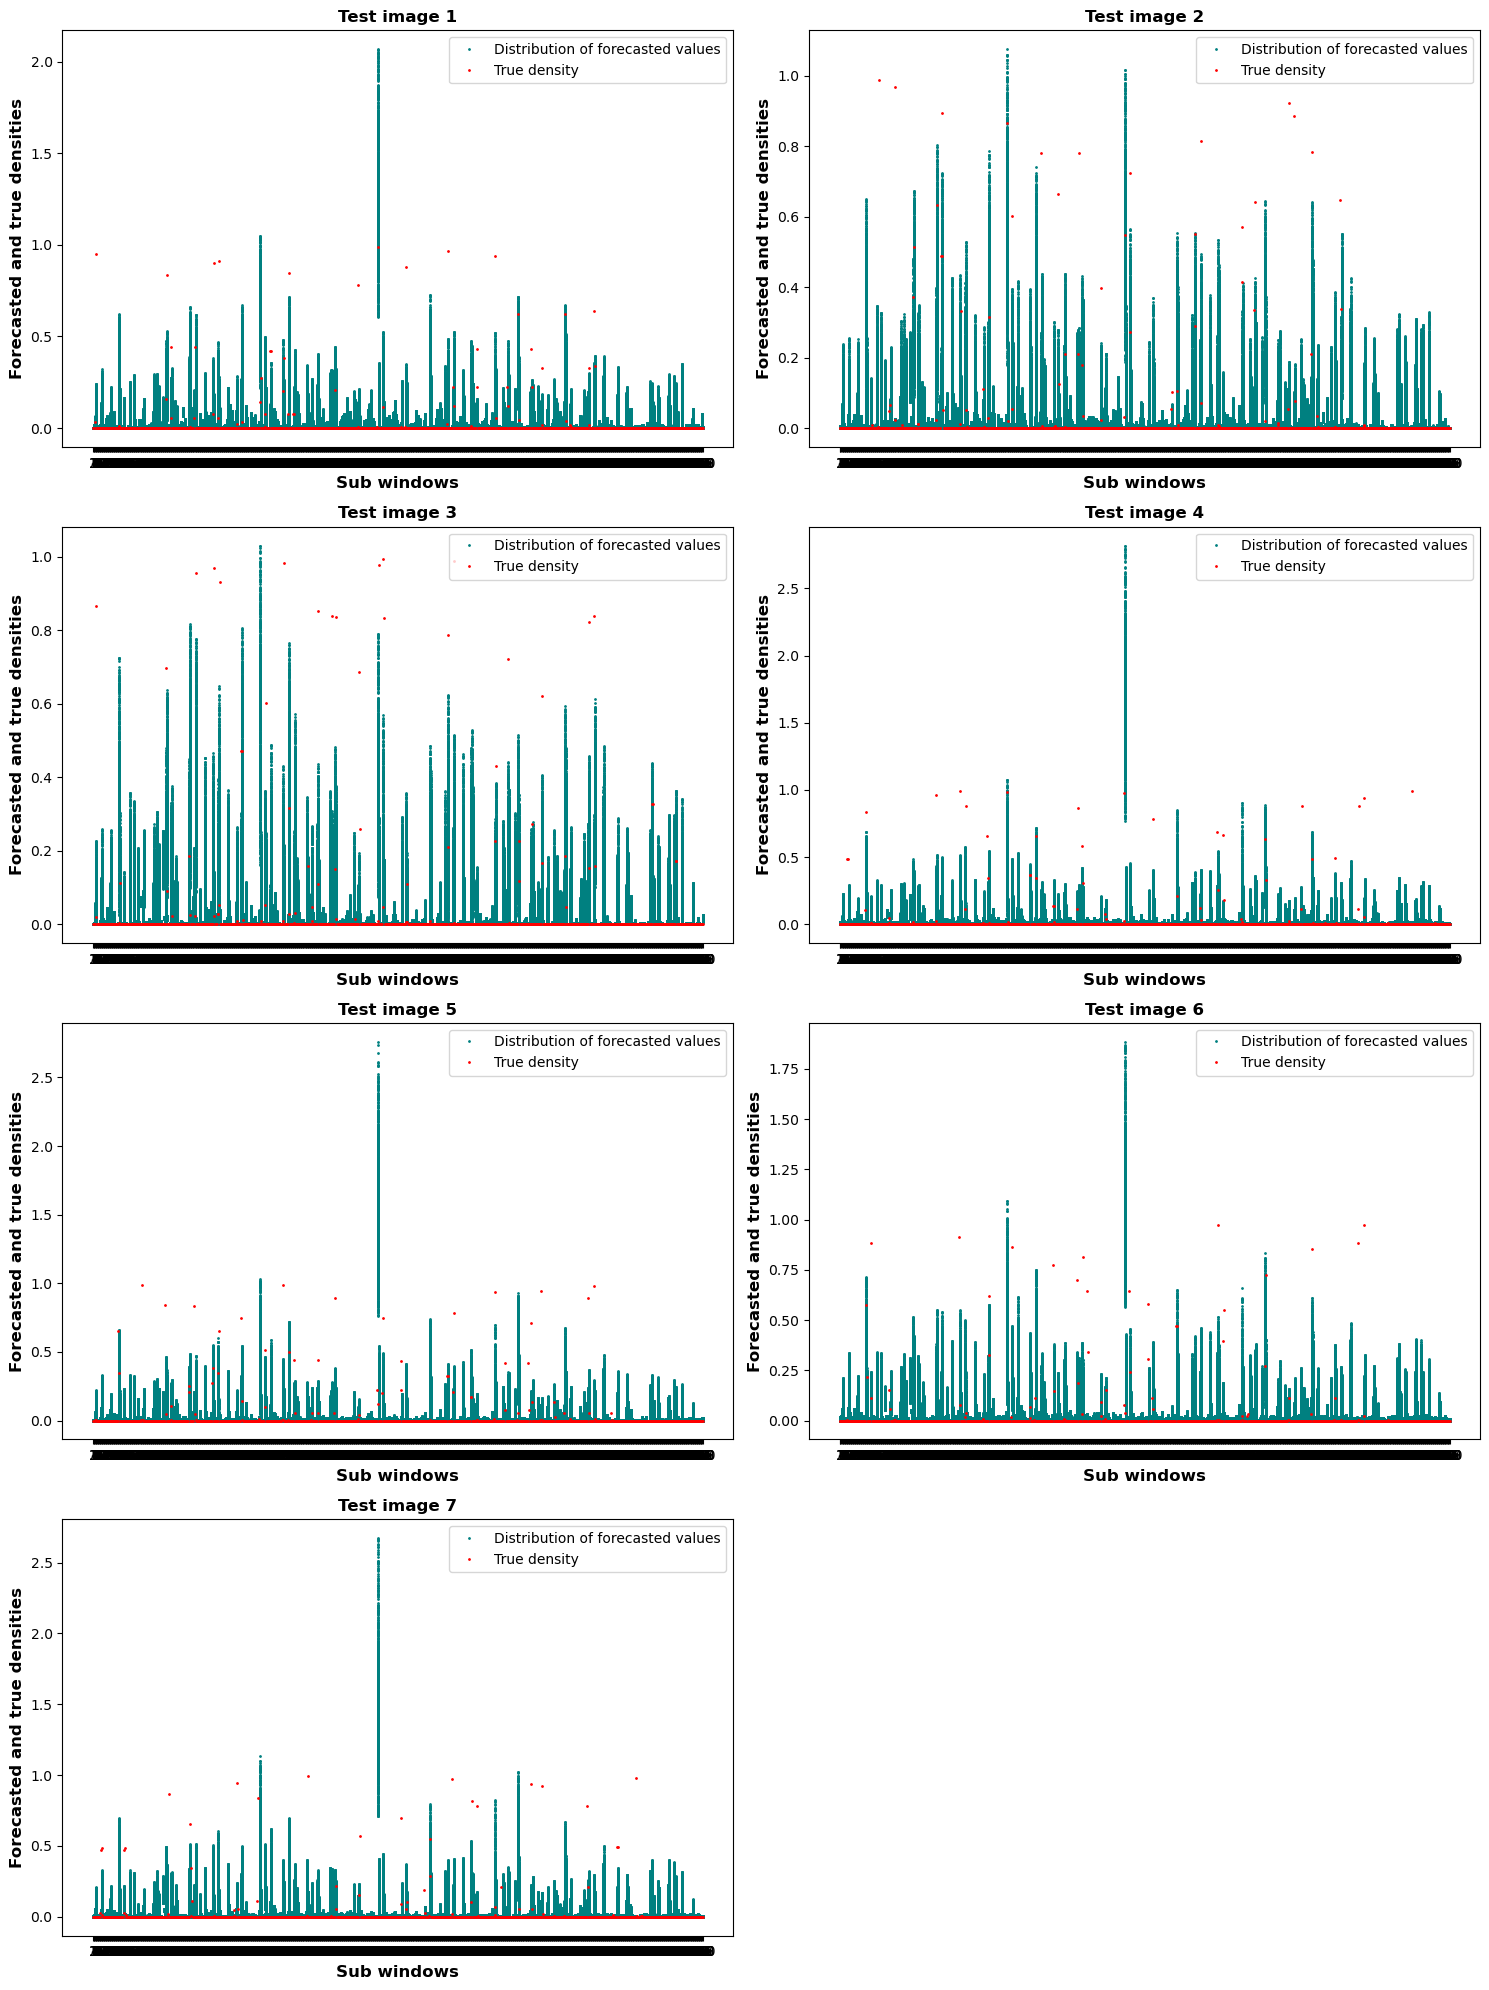

CPU times: user 30.2 s, sys: 857 ms, total: 31.1 s
Wall time: 30.8 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 